# Explore Sequence Diversity

This notebook is for exploring protein sequence diversity in a set of CAZymes, e.g. a CAZy family.

Prior to using this notebook:

1. Build a local CAZyme db using `cazy_webscraper`
2. Retrieve the protein sequences for each CAZy family of interest using the `cazomevole` subcommand `get_fam_seqs`
3. Run all-vs-all analysis using BLAST or DIAMOND using the `cazomevolve` subcommands `run_fam_blast` and `run_fam_diamond`, respectively

This notebook takes as input the output from BLASTP+/DIAMOND and visualises the data. 

Feel free to use this notebook as a template to perform further analyses.

## Imports

In [1]:
import seaborn as sns

from cazomevolve.seq_diversity.explore.cazy import get_cazy_proteins, get_cazy_db_prots
from cazomevolve.seq_diversity.explore.parse import load_data, remove_redunant_prots
from cazomevolve.seq_diversity.explore.plot import plot_clustermap, plot_heatmap_of_clustermap

## Constants

Define proteins of interest, e.g. proteins to be explored in the lab. These will be highlighed on the resulting clustermaps and heatmaps.

The `dict` uses the group name (e.g. a CAZy family) as the key, and is valued by a list of the NCBI protein version accessions.

In [2]:
CANDIDATES = {
    'PL20': ['EAA65331.1', 'UKZ86141.1', 'WAO96149.1']
}

## Get 'characterised' proteins from CAZy

To retrieve proteins listed in the 'characterised' or 'structure' tables in CAZy, using the `get_cazy_db_prots` function.

We store proteins listed in the characterised table in the variable `characterised_prots`, and proteins in the structure table are listed in `structure_prots`.

In [3]:
characterised_prots = {}  # {fam: [prot acc]}
characterised_prots['PL20'] = get_cazy_db_prots('PL20', characterised=True)
characterised_prots

Parsing characterised table for PL20: 100%|██████████| 7/7 [00:00<00:00, 5420.00it/s]


{'PL20': ['BAG80639.1', 'OSZ99920.1', 'OTA07247.1']}

In [4]:
structured_prots = {}  # {fam: [prot acc]}
structured_prots['PL20'] = get_cazy_db_prots('PL20', structured=True)
structured_prots

Parsing structured table for PL20: 100%|██████████| 7/7 [00:00<00:00, 9031.11it/s]


{'PL20': ['BAG80639.1']}

## Family analysis

Here is some example code for running the analysis for CAZy family PL20.


In [5]:
# load data
pl20_df = load_data('../../docs/examples/pl20/pl20_blastp', 'PL20')
pl20_df.head(5)

Identifying IPGs:   0%|          | 0/110 [00:00<?, ?it/s]

Identified 8 groups of identical proteins


,qseqid,sseqid,qlen,slen,length,pident,evalue,bitscore,BSR,qcov,scov
0,EAQ84327.1,EAQ84327.1,250,250,250,100.000,0.000000e+00,520.0,2.080,1.000,1.000000
1,EAQ84327.1,AEO59473.1,250,250,250,79.600,6.520000e-157,428.0,1.712,1.000,1.000000
2,EAQ84327.1,EDP51830.1,250,292,254,57.874,4.100000e-109,309.0,1.236,1.016,0.869863
3,EAQ84327.1,QSQ14196.1,250,255,251,53.785,3.570000e-101,287.0,1.148,1.004,0.984314
4,EAQ84327.1,QSQ27087.1,250,255,247,54.251,3.500000e-100,285.0,1.140,0.988,0.968627


In [6]:
# build clustermap of BLAST Score Ratio
pl20_bsr_plt = plot_clustermap(pl20_df, 'PL20', 'BSR', fig_size=(100, 100), save_fig='pl20_clustermap.png')
pl20_bsr_plt

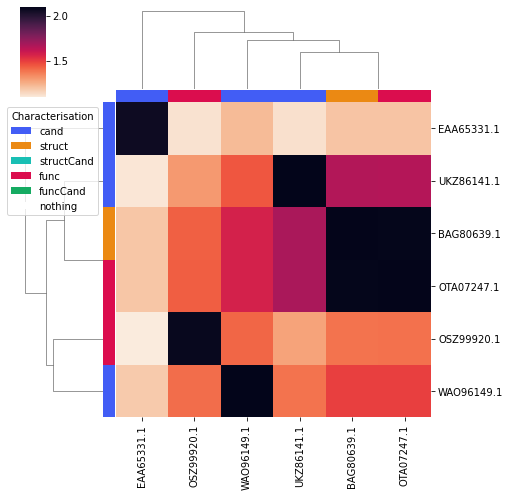

In [7]:
# plot a clustermap of only the candidates and functionally/structurally characterised proteins
# that is also annotated to differentiate, candidates and functionally/structurally characterised proteins
pl20_char_bsr_plt = plot_clustermap(
    pl20_df,
    'PL20',
    'BSR',
    fig_size=(7, 7),
    char_only=True,
    annotate=True,
    candidates=CANDIDATES, structured_prots=structured_prots, characterised_prots=characterised_prots,
)
pl20_char_bsr_plt

Then plot the precentage identity and query coverage for the candidate and functionally/structurally characterised proteins, plotting the proteins on the heatmaps in the same order as they appear in the clustermap.

PL20 percentage identity, colour scheme blue


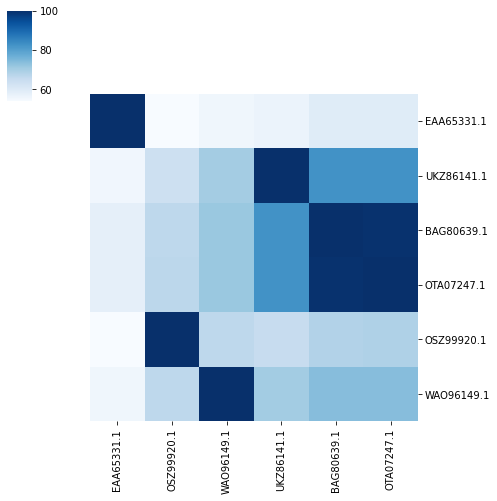

In [8]:
print('PL20 percentage identity, colour scheme blue')
plot_heatmap_of_clustermap(
    pl20_char_bsr_plt,
    pl20_df,
    'PL20',
    'pident',
    fig_size=(7, 7),
    colour_scheme=sns.color_palette("Blues", as_cmap=True),
    candidates=CANDIDATES, structured_prots=structured_prots, characterised_prots=characterised_prots,
)

PL20 query coverage, colour scheme purple


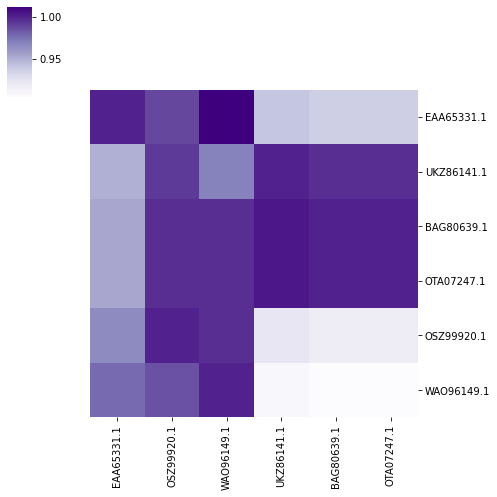

In [9]:
print('PL20 query coverage, colour scheme purple')
plot_heatmap_of_clustermap(
    pl20_char_bsr_plt,
    pl20_df,
    'PL20',
    'qcov',
    fig_size=(7, 7),
    colour_scheme=sns.color_palette("Purples", as_cmap=True),
    candidates=CANDIDATES, structured_prots=structured_prots, characterised_prots=characterised_prots,
)